In [95]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline 

In [96]:
from kerastuner.tuners import RandomSearch

In [97]:
pd.options.display.max_rows = 4000

In [98]:
df=pd.read_csv('train.csv',index_col=False)

In [99]:
def name(x):
    name=x[0]
    
    if 'Mr.' in (str(x).split()) :
        return 'Name_Mr'
    elif 'Mrs.' in (str(x).split()):
        return 'Name_Mrs'
    elif 'Miss.' in (str(x).split()):
        return 'Name_Miss'
    elif 'Master.' in (str(x).split()):
        return 'Name_Master'
    else:
        return 'Name_Others'

In [100]:
df['Name']=df[['Name']].apply(name,axis=1)

In [101]:
df['Embarked'].fillna('S',inplace=True)

In [102]:
def age(x):
    age=x[0]
    cls=x[1]
    
    if pd.isnull(age):
        if cls==1:
            return 38
        elif cls==2:
            return 30
        elif cls==3:
            return 25
    else:
        return age

In [103]:
df['Age']=df[['Age','Pclass']].apply(age,axis=1)

In [104]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [105]:
sex=pd.get_dummies(df['Sex'],drop_first=True)
emb=pd.get_dummies(df['Embarked'],drop_first=True)
df.drop(['Sex','Embarked'],axis=1,inplace=True)
df=pd.concat([df,sex,emb],axis=1)

<AxesSubplot:>

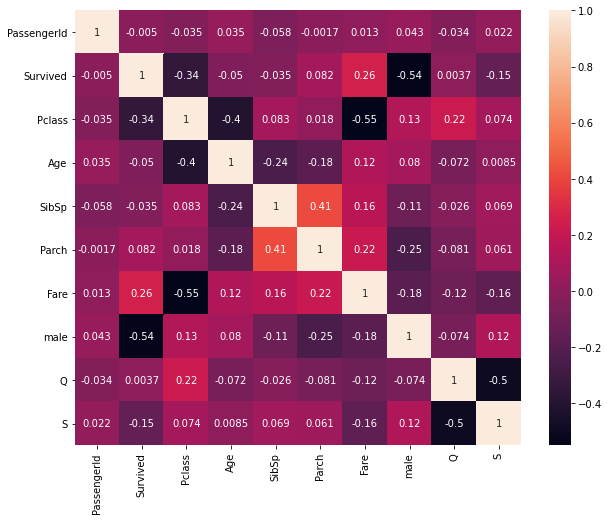

In [106]:
plt.figure(figsize=(10,8))
cor=df.corr()
sns.heatmap(cor,annot=True)

<AxesSubplot:xlabel='Survived', ylabel='count'>

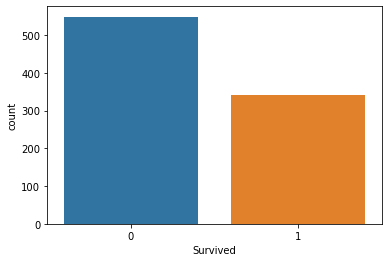

In [107]:
sns.countplot(x='Survived',data=df)

In [108]:
df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [109]:
name=pd.get_dummies(df['Name'],drop_first=True)
df=pd.concat([df,name],axis=1)

In [110]:
df.drop(['Ticket','PassengerId','Name','Cabin'],axis=1,inplace=True)

In [111]:

def combine_categorical_vars(data, col1,col2):
    #Get only the required columns from the dataframe
    cols = [col1, col2]
    one_hot_df = data.drop(columns = [col for col in data.columns if col not in cols])
    
    #Get the one hot encodings
    one_hot_df = pd.get_dummies(one_hot_df, columns = one_hot_df.columns)
    
    #Get the unique values mapped to integers
    arr = [int("".join(str(i) for i in List),2) for List in np.array(one_hot_df)] #Convert binary values to int    
    map_dict = {}
    for index, j in enumerate(set(arr)): #Map each int value to index (0,1,..)
        map_dict[j] = index
    
    arr = list(map(lambda x: map_dict[x], arr))
    
    #Get the final labels
    data[col1+'_'+col2] = arr# np.argmax(np.array(one_hot_df), axis =1)
    return data

In [112]:
combine_categorical_vars(df,'Parch','SibSp')
combine_categorical_vars(df,'male','Name_Mr')
df.drop(['SibSp','Parch','Name_Mr','male',],axis=1,inplace=True)
df

,Survived,Pclass,Age,Fare,Q,S,Name_Miss,Name_Mrs,Name_Others,Parch_SibSp,male_Name_Mr
0,0,3,22.00,7.2500,0,1,0,0,0,20,1
1,1,1,38.00,71.2833,0,0,0,1,0,20,0
2,1,3,26.00,7.9250,0,1,1,0,0,21,0
3,1,1,35.00,53.1000,0,1,0,1,0,20,0
4,0,3,35.00,8.0500,0,1,0,0,0,21,1
5,0,3,25.00,8.4583,1,0,0,0,0,21,1
6,0,1,54.00,51.8625,0,1,0,0,0,21,1
7,0,3,2.00,21.0750,0,1,0,0,0,15,2
8,1,3,27.00,11.1333,0,1,0,1,0,8,0
9,1,2,14.00,30.0708,0,0,0,1,0,20,0


<AxesSubplot:>

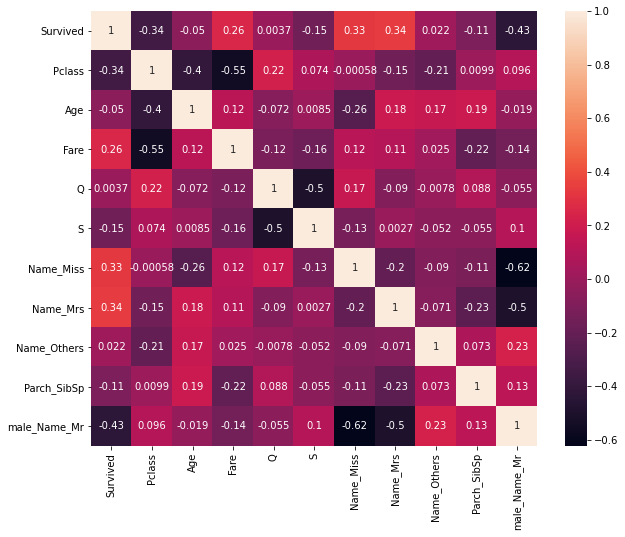

In [113]:
plt.figure(figsize=(10,8))
cor=df.corr()
sns.heatmap(cor,annot=True)

In [114]:
from tensorflow.keras import layers
from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler()
x=df.drop('Survived',axis=1)
y=df['Survived']

In [115]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=4)
x_train=sc.fit_transform(x_train)
x_test=sc.fit_transform(x_test)

In [116]:
import keras
from keras.models import Sequential
from tensorflow import keras
from keras.layers import Dense,Dropout
import keras_tuner as kt

In [120]:
def build_model(hp):
    model = keras.Sequential()
    model.add(keras.layers.Dense(
      hp.Choice('units', [4,8,16,32,64,128]),hp.Choice('activation',['relu','leaky_relu'])
        ,kernel_initializer='he_uniform',input_dim=10))
    model.add(keras.layers.Dense(1, activation='sigmoid',kernel_initializer='he_uniform'))
    model.compile(loss='binary_crossentropy', optimizer='adam',metrics='accuracy')
    return model
    

In [121]:
tuner = kt.RandomSearch(
    build_model,
    objective='accuracy',
    overwrite=True,
    max_trials=5)

In [122]:
tuner.search(x_train, y_train, epochs=150,batch_size=10)
best_model = tuner.get_best_models()[0]

Trial 5 Complete [00h 00m 19s]
accuracy: 0.8328651785850525

Best accuracy So Far: 0.834269642829895
Total elapsed time: 00h 01m 34s
INFO:tensorflow:Oracle triggered exit


In [ ]:
prediction=best_model.predict(x_test)
prediction=(prediction > 0.5).astype(int)

In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score
print(confusion_matrix(prediction,y_test))
print(accuracy_score(prediction,y_test))

In [ ]:
test=pd.read_csv('my_test.csv')
test

In [ ]:
test=sc.fit_transform(test)

In [ ]:
pred=best_model.predict(test)
pred=(pred >0.5).astype(int)
pred

In [ ]:
submission = pd.read_csv('gender_submission.csv')
submission['Survived'] = pred
submission.to_csv('Comp_submission.csv', index=False)